In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
df = pd.read_csv("/content/gdrive/My Drive/titanic.csv")

In [3]:
print(df.head())

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
print(df['Sex'][df['Sex'] == 'male'].value_counts())

male    577
Name: Sex, dtype: int64


In [6]:
print(df['Survived'].sum() / df['Survived'].count())

0.3838383838383838


In [7]:
print(df['Age'].mean(), ' ', df['Age'].median())

29.69911764705882   28.0


In [8]:
df['SibSp'].corr(df['Parch']).round(2)

0.41

In [9]:
from sklearn.tree import DecisionTreeClassifier

X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([0, 1, 0])
clf = DecisionTreeClassifier()
clf.fit(X, y)
importances = clf.feature_importances_
print(importances)

[0.25 0.75]


Number of nodes in the last tree is: 1 with ccp_alpha: 0.14240922624956154


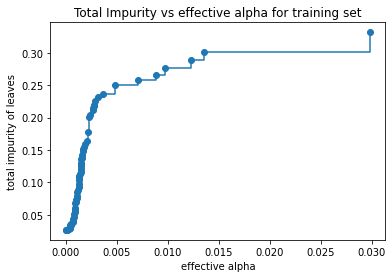

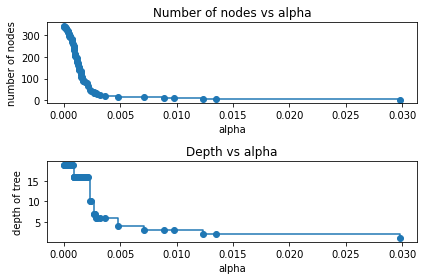

In [10]:
from sklearn.impute import SimpleImputer
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

X = df[['Pclass', 'Fare', 'Age', 'Sex']].copy()
Y = df['Survived'].copy()
X = pd.get_dummies(X, drop_first=True)
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X)
X = imp.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)
clf = DecisionTreeClassifier(random_state=241)

path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#clf.fit(X, Y)
#imp = clf.feature_importances_
#print(imp)
#fig = plt.figure(figsize=(25,20))
#_ = tree.plot_tree(clf,
#                   filled=True)

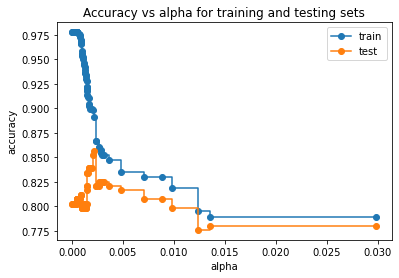

In [11]:
train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [12]:
max_score = 0
ind = 0
for i in range(len(test_scores)):
    if max_score < test_scores[i]:
        ind = i
        max_score = test_scores[i]

best_alpha = ccp_alphas[ind]

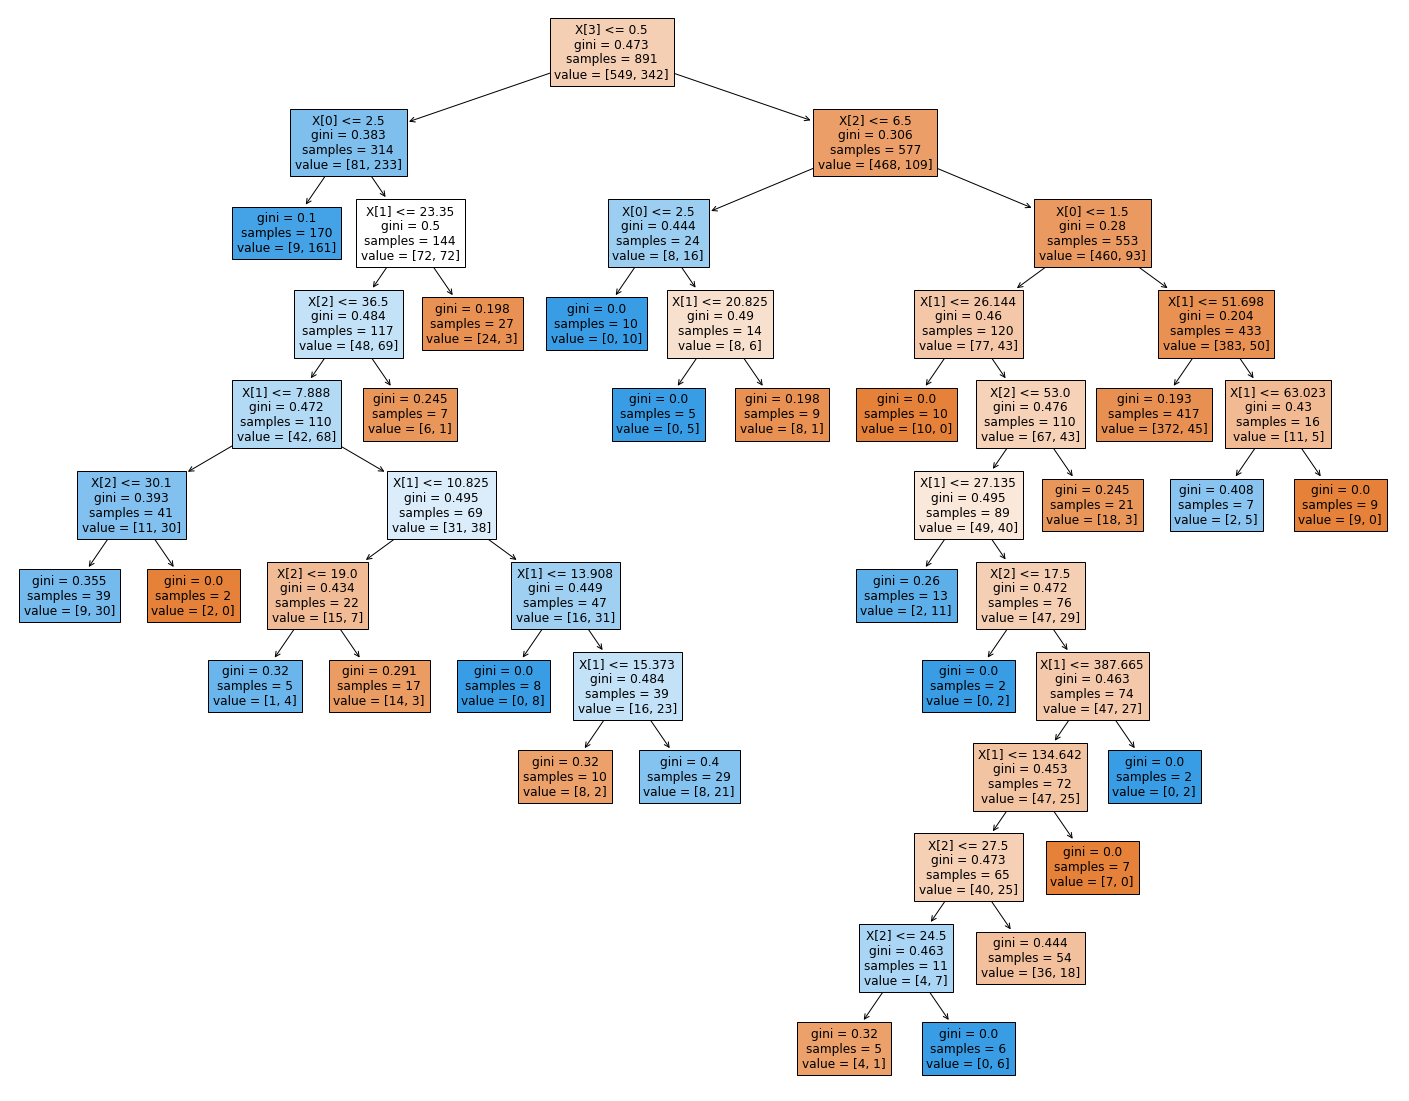

In [13]:
best_clf = DecisionTreeClassifier(random_state = 0, ccp_alpha=best_alpha)
best_clf.fit(X, Y)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_clf,
                   filled=True)

In [14]:
best_clf.score(X, Y)

0.8787878787878788